In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
from matplotlib import rcParams
rcParams['figure.figsize']=12,6
sns.set_style('darkgrid')

# Data Preprocessing and Visualization

In [2]:
my_data = pd.read_csv('diabetes_data_upload.csv')
my_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


Using .info() to see if there is any missing values

In [4]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [5]:
my_data.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [6]:
# define the mapping for Yes/No, Male/Female and Positive/Negative
mapping = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0,'Positive': 1, 'Negative' : 0}

# replace the values in the dataset using the mapping
my_data.replace(mapping, inplace=True)

# print the updated dataset
my_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [7]:
my_data.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


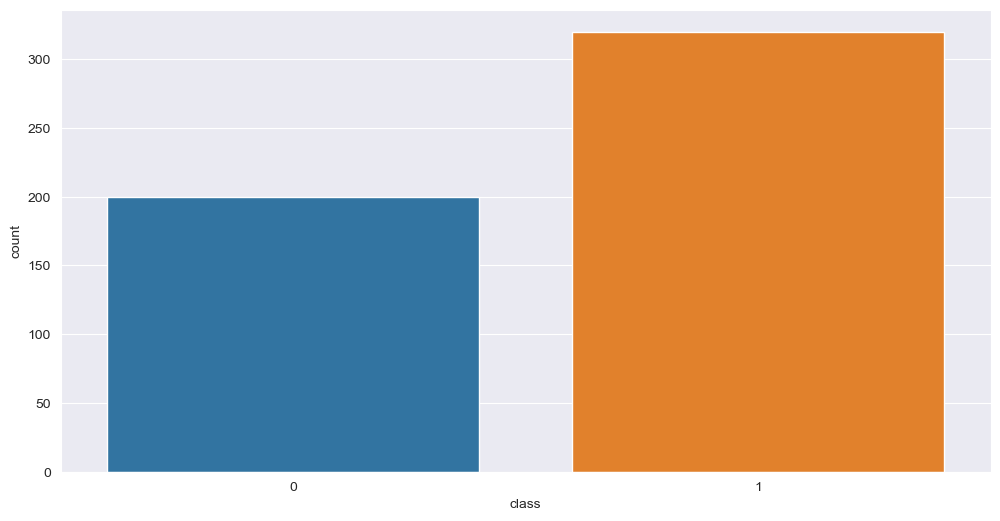

In [8]:
# Count the number of patients that may have diabetes, 1 is diabetes and 0 is non-diabetes
sns.countplot(x=my_data['class'])
plt.show()

From the above graph, we can see there are more people who have diabetes than people who don't.

Visualizing the relationship between age and diabetes. Creating an age-range group and then we will group the data by age-range and class, which then will be plotted with barplot.

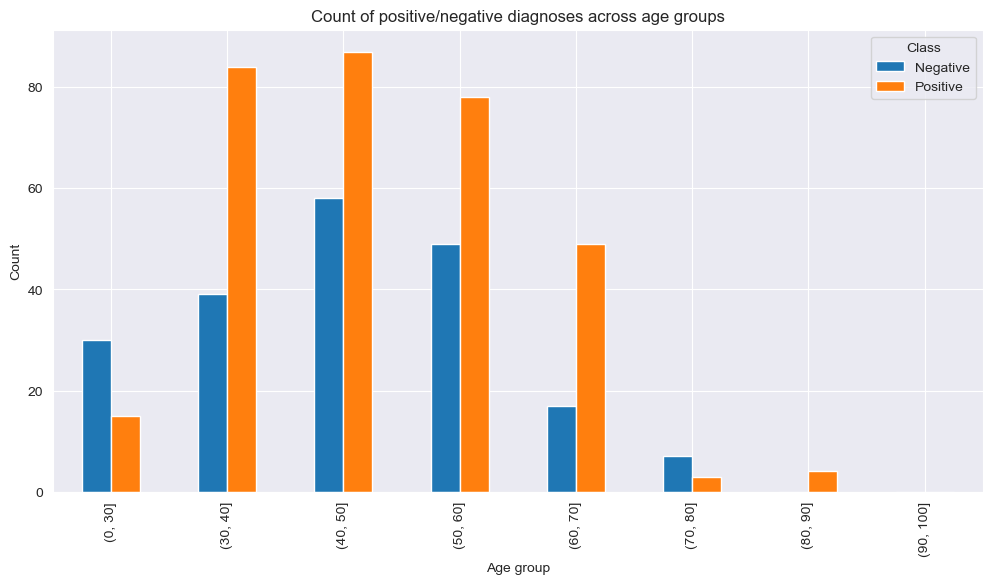

In [9]:
# Create age groups
age_groups = pd.cut(my_data['Age'], [0, 30, 40, 50, 60, 70, 80, 90, 100])

# Group the data by age group and class
age_class_counts = my_data.groupby([age_groups, 'class'])['class'].count().unstack()

# Plot the bar graph
age_class_counts.plot(kind='bar', stacked=False)
plt.xlabel('Age group')
plt.ylabel('Count')
plt.title('Count of positive/negative diagnoses across age groups')
plt.legend(title='Class', labels=['Negative', 'Positive'])
plt.show()

From the above graph, we can see from the age 0 to 30, we have less chance to have diabetes. The older group, from 30 to 70, people have a higher risk of having diabetes.

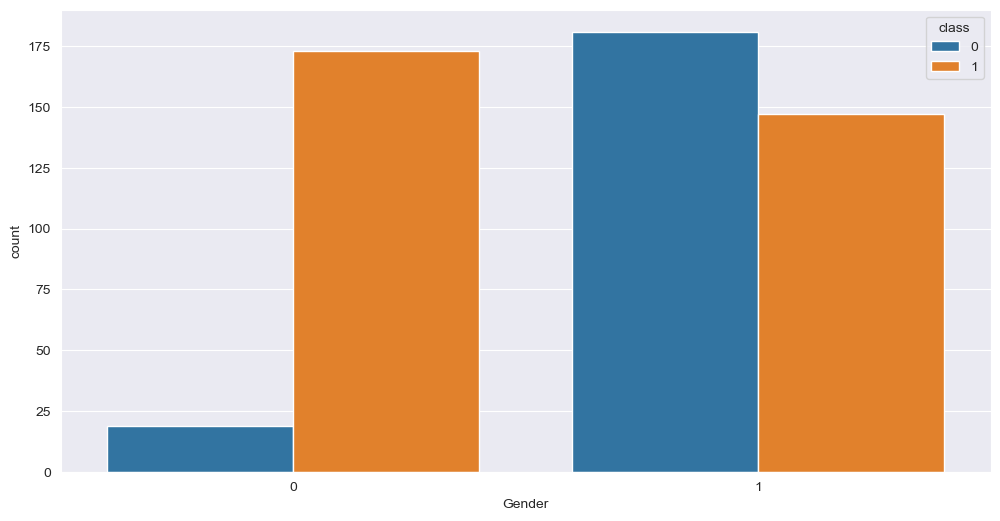

In [10]:
#A graph to see the relationship between gender and diabetes
sns.countplot(x='Gender',hue='class',data=my_data)
plt.show()

From this graph, we can understand that gender is an important factor to diabetes, we can easily see that the diabetes rate is significantly different between the two genders, the number of women who have diabetes is way higher than people who don't. On the other hand, there are more men in the dataset but the number of them having diabetes is less than the people who have.

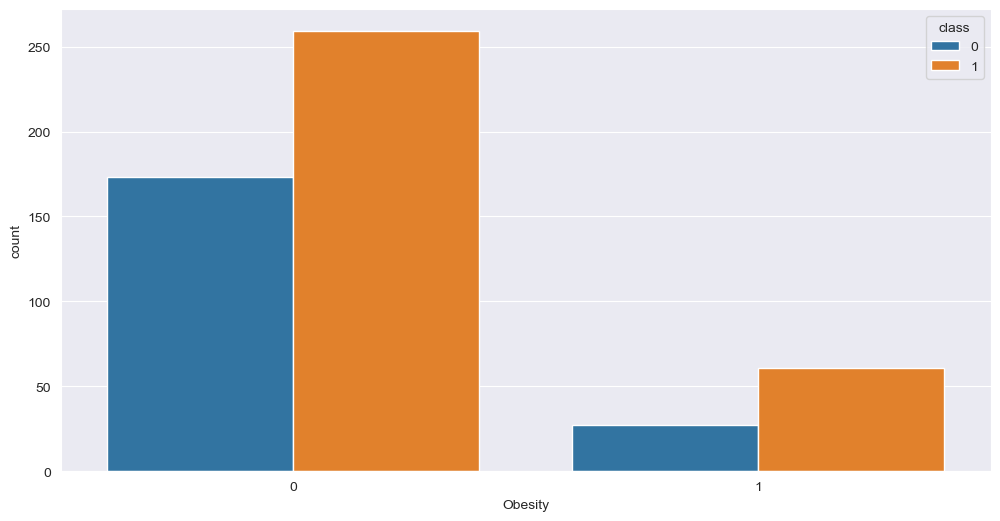

In [11]:
#Another graph to see the relationship between obesity and diabetes
sns.countplot(x='Obesity',hue='class',data=my_data)
plt.show()

From the graph, we can conclude that the obesity doesn't affect much to our target, since the rate of people having diabetes is not different between the two groups of people have obesity. This is a surprise observation because most people will think obesity is related to diabetes. 

Creating a heatmap to see the relationship between the features and how they strong they are related to the target based on their color and value.

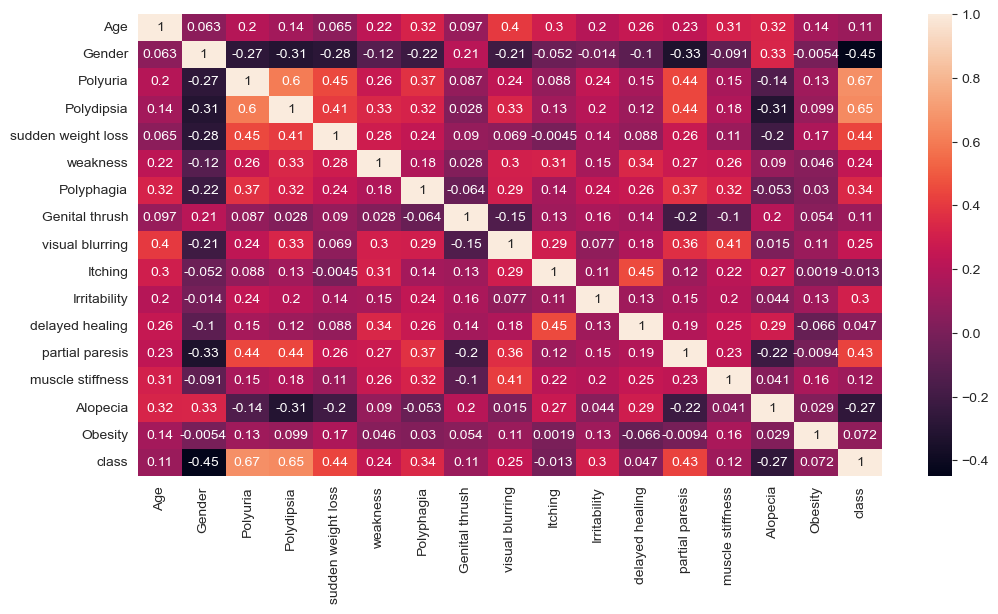

In [12]:
# Creating heatmap with Seaborn
sns.heatmap(data=my_data.corr(),annot=True)
plt.show()

And as shown in the heatmap, we find out that the features Gender, Polyuria, Polydipsia, sudden weight loss, and partial are strongly connected to the class variable.

For scaling our data, we will use MinMax scaler.

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Select columns features for X and y
X = my_data.drop('class',axis=1)
y = my_data['class']

# Create a scaler object
scaler = MinMaxScaler()

# Split the scaled features and target into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
#We should always fit the scaler to the training data only and then use the same scaler to transform both the training and testing data. This ensures that the test data doesn't influence the scaling.
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Convert X_train and X_test to a DataFrame
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Print the first few rows of X_train_df
X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0.500000,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.337838,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.513514,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.459459,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.297297,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# will append scores here for plotting later
test_scores = []
train_scores = []

# testing k values from 1-14
for i in range(1,15):
    # create a model with k=i
    knn = KNeighborsClassifier(n_neighbors=i)
    # train the model
    knn.fit(X_train,y_train)
    
    # append scores. 
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

K-nearest neighbor classification is performed on the dataset to diagnose whether a patient has diabetes or not. K values are ranging from 1-14. The training and testing scores are kept track of each value of k ranging from 1-14.



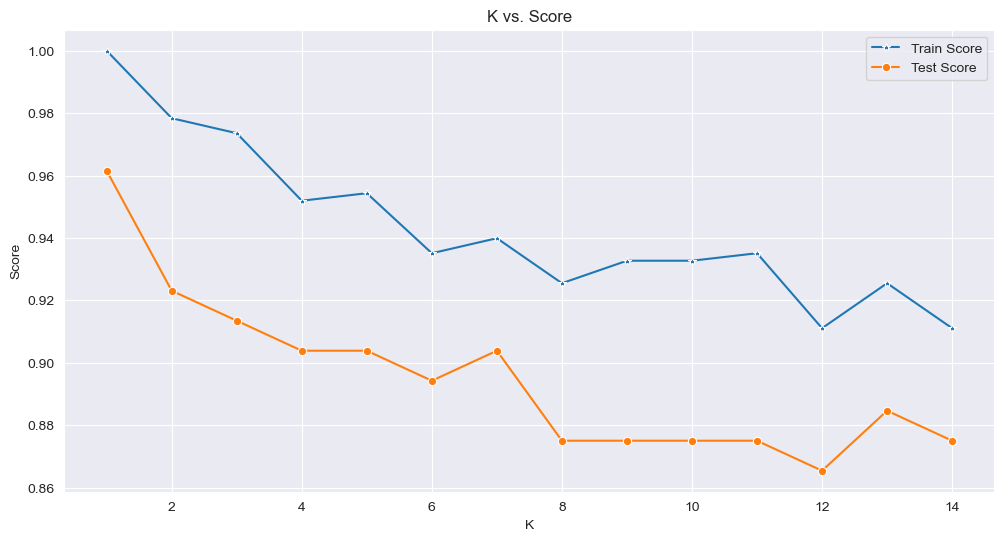

In [15]:
sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,15), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

From the plot, we observe that k=2 has higher training and testing score which is pretty good. Almost all values of k performed the classification nicely with accurate and realistic train and test score.

In [16]:
#the best seemes to be 7 so lets do k = 7
knn = KNeighborsClassifier(7)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9038461538461539

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        33
           1       0.96      0.90      0.93        71

    accuracy                           0.90       104
   macro avg       0.88      0.91      0.89       104
weighted avg       0.91      0.90      0.91       104

[[30  3]
 [ 7 64]]


The KNN model achieved an accuracy of 90 which is realistic and reasonable in diagnosing diabetes in patients.

# Naive Bayes

This step is where I will create the model and fit the model with the training data set.

In [18]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes model
nb= GaussianNB()

#fitting the model
nb.fit(X_train,y_train)

GaussianNB()

Next step is evaluating the model, I will be predicting and finding the accuracy score of the models

In [19]:
#Predictions
y_prediction = nb.predict(X_test)
y_pred_train = nb.predict(X_train)
# Checking overfitting by comparing the train and test set score:

print('Training score is:',nb.score(X_train, y_train))
print('Testing score is:',nb.score(X_test,y_test))

Training score is: 0.8966346153846154
Testing score is: 0.9134615384615384


The reason why I do this step is to see the difference between the accuracy between the two data sets, and since the difference is quite small, the model doesn't seem to have any overfitting.

Printing confusion matrix, the matrix will show all the True/False Negatives and True/False Positives, and this will help us to observe the number of times the model predicted correctly and incorrectly.

[[28  5]
 [ 4 67]]


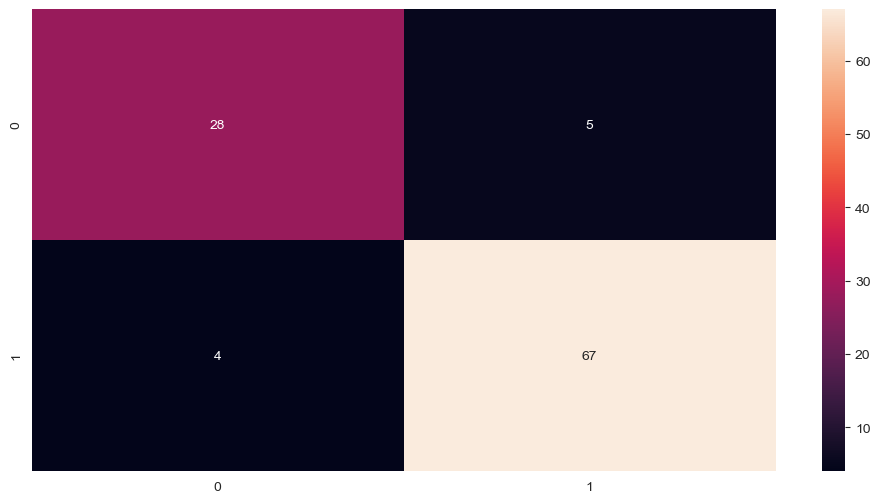

In [20]:
# Printing confusion matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_prediction))

#Visualizing the confusion matrix with a heatmap

sns.heatmap(data=confusion_matrix(y_test,y_prediction),annot=True)
plt.show()

From the above confusion matrix, we can see that the True Positives and True Negatives are highest, which indicates that our model is pretty accurate in classifying the data.

Next is printing classification report to see the f1 score, precision, recall and support metrics scores. These are the values that we use to determine the model's perfomance.

In [21]:
# Printing classification report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.93      0.94      0.94        71

    accuracy                           0.91       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.91      0.91       104



From the classification report, we can see that the precision score is really high, 93% of the patients that are predicted diabetes do have diabetes, as well as the recall score, 94% is the percentage that the outcomes predicted correctly on the patients that actually have diabetes. Overall we can conclude that the model performs really well in predicting the class of the patients, since the F1-score is also really high, 0.94.

Printing the accuracy score based on predictions and test values.

In [22]:
#Model accuracy score
from sklearn.metrics import accuracy_score

print('The accuracy of our model is:',accuracy_score(y_test,y_prediction))

The accuracy of our model is: 0.9134615384615384


Additionally, I will perform k-Fold Cross Validation to expect the model accuracy and we can compare it with the above accuracy score of the model.

In [23]:
from sklearn.model_selection import cross_val_score

#Using 10 as number of k, since this is the common and popular when performing it.
kfcv_scores = cross_val_score(nb,X_train,y_train,cv=10, scoring = 'accuracy')

#Printing the cross validation scores
print('k-Fold Cross Validation scores is:',kfcv_scores)

k-Fold Cross Validation scores is: [0.92857143 0.9047619  0.95238095 0.85714286 0.85714286 0.97619048
 0.82926829 0.90243902 0.80487805 0.90243902]


In [24]:
#Additionally we can compute the average of the scores, then we can use it as the expected accuracy
print('Average of k-Fold scores is: {:.3f}'.format(kfcv_scores.mean()))

Average of k-Fold scores is: 0.892


From the above result, we can conclude that the evaluated accuracy of the model is 0.892. We then see the different between the accuracy from the k-fold and the accuracy_score function is not different, which we are confident about having a high accuracy around 0.9 of our model's perfomance on this data set.

## RANDOM FOREST

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# define parameter grid to search over
#min_samples_split is a parameter in decision tree-based algorithms such as Random Forest, which specifies the minimum number of samples required to split an internal node. The split will not be performed if the number of samples is less than min_samples_split
#number of trees created
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth':  [5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [5,7,10]}

# create a random forest classifier object
rf = RandomForestClassifier(random_state=42)

# perform grid search using 5-fold cross validation
from sklearn.model_selection import GridSearchCV
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
rf_cv.fit(X_train, y_train)

# extract best parameters and score
best_params = rf_cv.best_params_
best_score = rf_cv.best_score_

# train model with best parameters on entire training set
rf = RandomForestClassifier(random_state=42,  bootstrap=True, oob_score=True, **best_params)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# print results
print('Best Parameters:', best_params)
print('Best Score:', best_score)
print('OOB Score:', rf.oob_score_)
print('Test Accuracy:', test_accuracy)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.9350545037292026
OOB Score: 0.9471153846153846
Test Accuracy: 0.9423076923076923


n_estimators: Number of trees in the random forest model. The more trees, the more robust the model is to overfitting, but also the more computationally expensive it becomes. 

max_depth: Maximum depth of the decision trees. This parameter controls the maximum number of levels in each decision tree, and thus the complexity of the model. Higher values of max_depth increase model complexity, but may lead to overfitting. A max_depth of None means that there is no maximum depth.

min_samples_split: Minimum number of samples required to split a node. This parameter controls the minimum number of samples required to split a node, which affects the minimum size of the resulting leaves. Higher values of min_samples_split reduce the risk of overfitting, but may result in underfitting.

min_samples_leaf: Minimum number of samples required in a leaf. This parameter controls the minimum size of the leaves in the decision trees, and thus affects the complexity of the model. Higher values of min_samples_leaf can reduce overfitting, but may result in underfitting.

We performed GridSearch to optimize the model's performance. The grid search fits the model on the training data for each combination of hyperparameters and evaluates its performance on the validation set. We used 5-fold cross validation. Finally, it returns the best hyperparameters that maximizes the average accuracy score across all cross-validation folds.

Then we fit our Random Forest model with the best parameters and returned the Test accuracy score and Out of Bag score.


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.93      0.99      0.96        71

    accuracy                           0.94       104
   macro avg       0.95      0.92      0.93       104
weighted avg       0.94      0.94      0.94       104



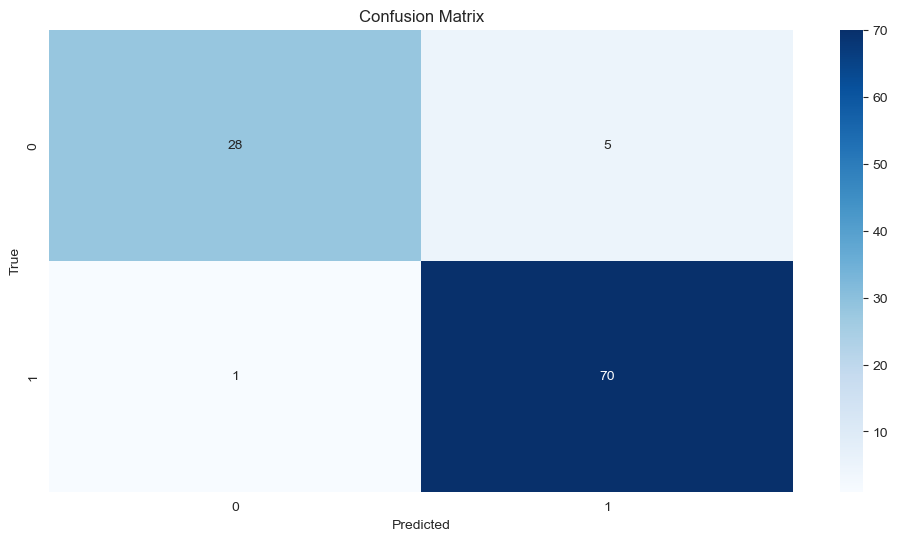

In [45]:
# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Precision is the proportion of true positive predictions (TP) out of all positive predictions (TP + FP). In other words, it measures how often the model is correct when it predicts the positive class. In this example, the precision for class 0 is 0.97 and for class 1 is 0.93.

Recall is the proportion of true positive predictions (TP) out of all actual positive instances (TP + FN). It measures how often the model correctly identifies positive instances. In this example, the recall for class 0 is 0.85 and for class 1 is 0.99.

F1-score is the harmonic mean of precision and recall. It's a balanced measure that combines both precision and recall. In this example, the F1-score for class 0 is 0.90 and for class 1 is 0.96.

Overall, the accuracy of the model is 0.94, which means it correctly predicts the class for 94% of the instances.

## CONCLUSION

After comparing all 3 models' test accuracy we found that the Random Forest Classifier and Naive Bayes performed better than KNN. Random Forest had the best accuracy score of 94%. Since the dataset had mainly categorical variables we expected models like Naive Bayes and Random Forests. These models can handle categorical variables well and are known for their interpretability.

There could be multiple reasons why Naive Bayes and Random Forests might perform better than KNN for a dataset with mainly categorical features:

KNN is highly sensitive to the curse of dimensionality, which means that as the number of features increase, the distance between points in the feature space also increases. This makes it difficult for KNN to accurately identify similar points in high-dimensional feature spaces. On the other hand, Naive Bayes and Random Forests are less affected by the curse of dimensionality, and hence may perform better for datasets with many categorical features.

Random Forests are able to handle high-dimensional data because they use decision trees as their base models, which can effectively partition the feature space into smaller subspaces. This can help reduce the complexity of the problem and prevent overfitting.

KNN can also struggle with imbalanced datasets, where one class is much more prevalent than the other. This is because KNN assigns labels based on the majority class in the K-nearest neighbors, which can lead to misclassification of minority classes.

Naive Bayes and Random Forests, on the other hand, can handle imbalanced datasets better and provide more accurate predictions for minority classes. Naive Bayes is relatively robust to class imbalance because it relies on the probabilities of each class, rather than the absolute number of examples in each class. Random Forests can handle imbalanced datasets by adjusting the weights of the samples during training, which gives more importance to the minority class. Additionally, the randomness in the sampling of features and samples during training can help prevent overfitting to the majority class.